In [1]:
import json
import pandas 

import matplotlib.pyplot as plt
import numpy as np

import datetime


In [2]:
historical = pandas.read_csv("project/data/dwd/historical/stundenwerte_RR_04189_akt.txt", sep=";")
historical["MESS_DATUM"] = pandas.to_datetime(historical["MESS_DATUM"], format=f"%Y%m%d%H")
historical = historical.set_index("MESS_DATUM")

historical.head()

FileNotFoundError: [Errno 2] No such file or directory: 'project/data/dwd/historical/stundenwerte_RR_04189_akt.txt'

## preprocess data

In [ ]:
historical = historical[historical["  R1"] >= 0]

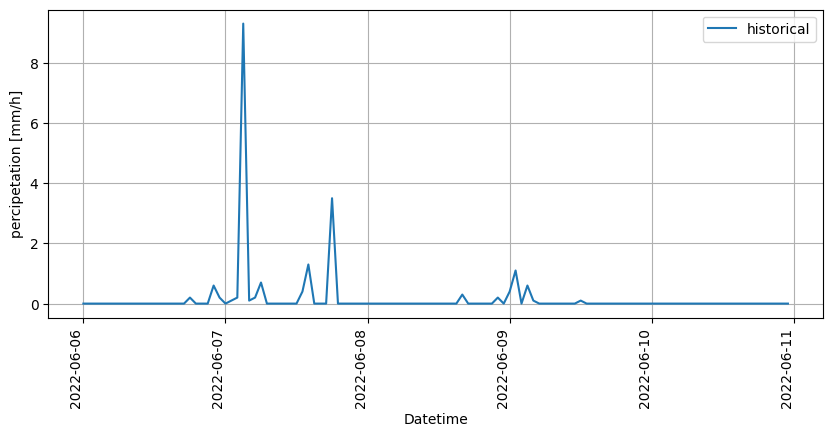

In [ ]:
# plt.plot(historical["MESS_DATUM"][:24], historical["  R1"][:24])
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(historical.index[:5*24], historical["  R1"][:5*24], label="historical")
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=90, ha="right")
ax.set_xlabel("Datetime")
ax.set_ylabel("percipetation [mm/h]")
ax.grid()
ax.legend()

None


Text(0, 0.5, 'percipetation [mm/h]')

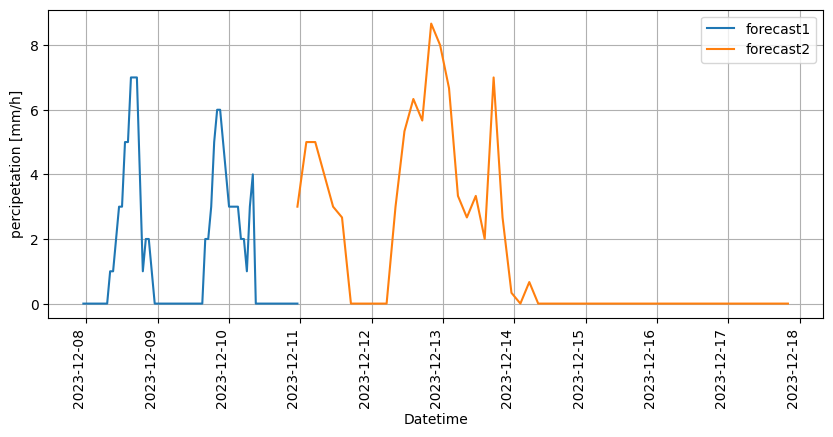

In [8]:
with open("../project/data/dwd/test/1701990241.json", "r") as file:
    content = json.load(file)

station_content = content["Q771"]
forecast1 = station_content["forecast1"]

precipitation1 = forecast1["precipitationTotal"]

time_axis1 = np.arange(start=forecast1["start"], stop = len(precipitation1) * forecast1["timeStep"] + forecast1["start"], step=forecast1["timeStep"])

time_axis1 = [datetime.datetime.utcfromtimestamp(time_stamp) for time_stamp in time_axis1/1000] 

forecast2 = station_content["forecast2"]
precipitation2 = np.array(forecast2["precipitationTotal"], dtype=np.float64)
# scale to one hour:
norm_factor = forecast2["timeStep"] / forecast1["timeStep"]
precipitation2 /= norm_factor
time_axis2 = np.arange(start=forecast2["start"], stop = len(precipitation2) * forecast2["timeStep"] + forecast2["start"], step=forecast2["timeStep"])

time_axis2 = [datetime.datetime.utcfromtimestamp(time_stamp) for time_stamp in time_axis2/1000] 


fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(time_axis1, precipitation1, label="forecast1")
ax.plot(time_axis2, precipitation2, label="forecast2")
ax.grid()
ax.legend()
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=90, ha="right")
ax.set_xlabel("Datetime")
ax.set_ylabel("percipetation [mm/h]")

Note the different shape of curves in forecast1 vs forecast2

This is caused by the fact, that forecast2 has only values for 3 h each. 

Manipulate start time of historical data so it does line up with the begin  of the forecast.
This step has to be left out if we collect enough forecast data from the dwd.

Would it make sense if we would average 

In [ ]:
historical_copy = historical.copy()

new_time = np.arange()

13182